In [2]:
import jieba
import jieba.analyse
import pandas as pd
from collections import Counter
import codecs
import jieba.posseg as pseg
#引入工具

In [3]:
data=pd.read_csv('pttsv.csv')

In [4]:
data

,Unnamed: 0,title,links
0,0,[公告] 開版試閱 Shadowverse,ptt.cc/bbs/Shadowverse/M.1480424212.A.964.html
1,1,恭喜開板,ptt.cc/bbs/Shadowverse/M.1480424362.A.7BD.html
2,2,[恭喜] 恭喜開版,ptt.cc/bbs/Shadowverse/M.1480424393.A.BE0.html
3,3,[閒聊] 恭喜開板,ptt.cc/bbs/Shadowverse/M.1480424431.A.DD7.html
4,4,恭喜開版,ptt.cc/bbs/Shadowverse/M.1480424511.A.480.html
...,...,...,...
9965,9965,[情報] CDB指定杯,ptt.cc/bbs/Shadowverse/M.1667893943.A.63A.html
9966,9966,Fw: [公告] 關於利用網路擄人、囚禁等議題請板主宣導,ptt.cc/bbs/Shadowverse/M.1667986845.A.93B.html
9967,9967,[公告] 板規2.4 &檢舉區,ptt.cc/bbs/Shadowverse/M.1497267067.A.40F.html
9968,9968,[公告] 置底抱怨區,ptt.cc/bbs/Shadowverse/M.1533857805.A.74B.html


# 產生matrix圖表

In [24]:
'／','《','》','，','。','「','」','(',')','！','？','、','…',':',"[","]","~"
error_lst = []
terms=[]
stopword=[' ','[',']',"也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對","就", '\n','越','為','這種','多','越來',"請問","請","了","嗎","報","無",'／','《','》','，','。','「','」','(',')','！','？','、','…',':',"[","]","~",'"','&','/']
for i in range(len(data['title'])):
    try:
        for j in list(jieba.cut(data['title'][i], cut_all = False)):
            if j not in stopword:
                terms.append(j)
    except:
        error_lst.append([i, data['title'][i]])

In [25]:
firstcolum = {}          
relationships = {}  
toprow = []  
for i in range(len(data['title'])):
    try:
        poss = jieba.cut(data['title'][i], cut_all = False)
        toprow.append([])
        for w in poss:
            if w not in stopword:
                toprow[-1].append(w)        
            if firstcolum.get(w) is None and w not in stopWords:
                relationships[w] = {}            
    except:
        pass

In [26]:
term_dic = dict()
for sentence in toprow:
    for term in sentence:
        if term not in term_dic:
            term_dic[term] = {}

In [27]:
for i in range(len(toprow)):
    for term1 in term_dic:
        num = 0
        for term2 in toprow[i]:
            if term1 == term2:
                num += 1
        term_dic[term1][data['title'][i]] = num

In [28]:
matrix = pd.DataFrame.from_dict(term_dic)
matrix.head()

,恭喜,Fw,要,Re,中立,A1,一個,現在,新手,關於,...,私人,問題,【,7,新公會,一直,Rage,JCG,R,主教
[公告] 開版試閱 Shadowverse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
恭喜開板,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[恭喜] 恭喜開版,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[閒聊] 恭喜開板,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
恭喜開版,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 產生Cooccurrence Matrix

In [29]:
names = {}          
conect = {}  
lineNames = []     
for i in range(len(data['title'])):
    try:
        poss = jieba.cut(data['title'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopword:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopword:
                names[w] = 0
                conect[w] = {}
                names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if conect[name1].get(name2) is None:     
                conect[name1][name2]= 1
            else:
                conect[name1][name2] = conect[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in conect.items() for v, w in edges.items() if w > 25]

In [30]:
import numpy as np
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records

C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
C:\Users\hp8470\AppData\Local\Temp\ipykernel_2260\3671379800.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

,ル,5,勝,更新,之上,情報,ス,分享,ES,す,...,正式,SFL,賽,抽,FB,是不是,2017,動畫,銅卡,20
ル,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,76.0,NaN,NaN,87.0,NaN,64.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
勝,NaN,76.0,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
更新,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
之上,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
是不是,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
動畫,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
銅卡,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 點線圖產生

In [13]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])
# 找出重復次數

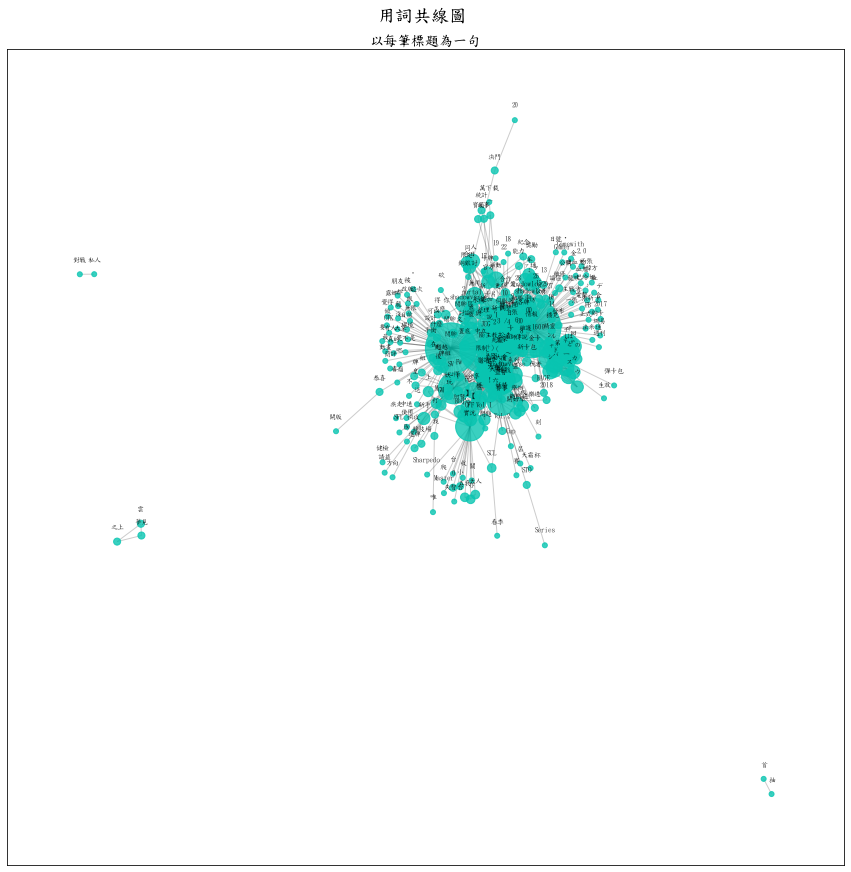

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
# 圖的大小
plt.rcParams['font.sans-serif'] = ['DFKai-SB']
# 設置圖像细節
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
# 把matrix圖表data引入
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, alpha=0.2)
#點和線的設定
for p in pos: 
    pos[p][1] = pos[p][1] + 0.03
# raise text positions
nx.draw_networkx_labels(g, pos, font_size = 7 , font_family='sans-serif', alpha=0.8) 
# 點的標示(用詞)
plt.title('以每筆標題為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
# 標題
plt.show()
# 生成點線圖